##Tarea 7


Encuentre un cero de la función

$$
f(x) = 1 - \cos(x) -\frac{\sin(x)}{x}
$$

entre $-6.4$ y $-6.0$ usando el método de Newton y el método de bisección. Grafique el número de iteraciones requerido así como el tiempo requerido en función de la precisión para ambos métodos.

#Desarrollo

Usare el mismo codigo que en la clase 12 para hacer el metodo de biseccion. 
El metodo se trata en encontrar un $a$ < $b$ tal que $f(a)f(b) < 0$. En este caso $a= -6.4$ y $b= -6.0$, luego los evaluamos en la funcion dada y vemos si lo escrito antes sucede. 

despues se  encuentra un punto p tal que  $p = a + \frac{a - b}{2}$. Luego vemos si $f(p_1) = 0$

In [117]:
import matplotlib.pyplot as plt
import numpy as np 

In [118]:
def biseccion(f, a, b, epsilon, N=1000000):
    
    pp = a
    for i in range(N):
        p = a + (b - a)/2
        if abs(pp - p)/abs(p) < epsilon:
            return p, i+1
        elif f(p)*f(a) > 0:
            a = p
        else:
            b = p
        pp = p
        
    raise MaxIterations("No se encontró el cero luego de", N, "iteraciones.")

In [119]:
def funcion(x):
    return 1- np.cos(x) - np.sin(x)/x 
  

In [120]:
funcion(-6.4)*funcion(-6.0) <0 # se cumple con lo descrito

True

In [131]:
biseccion(funcion,-6.4,-6.0,0.0001 ) #ocupamos la funcion con los parametros dados

(-6.283203125, 10)

Ahora ocupamos el metodo de newton, se ocupara el codigo visto en la clase 13 

In [122]:
class MaxIterations(Exception):
    pass

In [123]:
def metod_newton(funcion, derivada_f, punto, epsilon, N=1000000):
    
    for i in range(N):
        p = punto - f(punto)/derivada_f(punto)
        if abs(p - punto)/abs(p) < epsilon:
            return p, i+1
        punto = p
    
    raise MaxIterations("No se encontró el cero luego de", N, "iteraciones.")

In [124]:
def f(x):
  return 1-np.cos(x)-np.sin(x)/x

In [125]:
def derivada_f(x):
  return np.sin(x)- (x*np.cos(x)-np.sin(x))/x**2


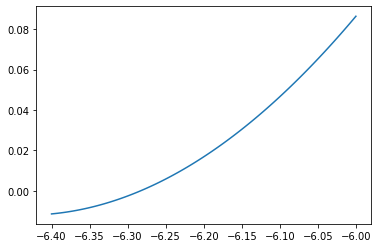

In [132]:
x= np.linspace(-6.4,-6,100) #grafico de la funcion para poder ver la forma de la funcion
plt.plot(x,f(x))


In [133]:
metod_newton(f,derivada_f,-6.0,   0.000000001) #evaluamos los datos en la funcion

(-6.283185307179586, 6)

In [128]:
biseccion(funcion, -6.4,-6.0,   0.000000001)

(-6.283185309171678, 26)

In [136]:
precision=np.array([1, 0.1, 0.01, 0.001, 0.0001, 0.00001, 0.000001, 0.0000001, 0.00000001, 0.000000001]) #un array con los datos de precision

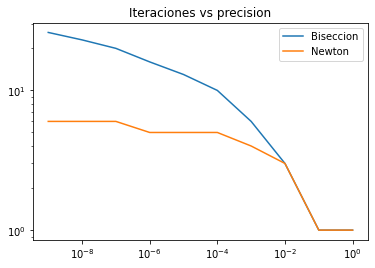

In [130]:

iter_biseccion=np.array([1, 1, 3, 6, 10, 13, 16, 20, 23, 26])
iter_newton= np.array([1, 1, 3, 4, 5, 5, 5, 6, 6, 6 ])


plt.loglog(precision, iter_biseccion, label='Biseccion')
plt.loglog(precision, iter_newton, label='Newton')
plt.title('Iteraciones vs precision')
plt.legend()

# Calificación: 7.0

¿Pero qué concluyes del gráfico?